#### Table of Contents
* Importation 
* Reframing & Scaling Dataset
* Dendrogram Methods Scaled
* Dendrogram Methods Unscaled

### 1 Importation

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
#import data
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\df_unscaled.csv"))

In [4]:
#import pleasant weather data
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

### 2 Reframing & Scaling Dataset

In [14]:
df.columns.tolist()

['Unnamed: 0',
 'DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDO

In [5]:
#reducing dataset to a year range
yeardf=df[df['DATE'].astype(str).str.contains('199')]
print(yeardf)

       Unnamed: 0      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
10958       10958  19900101      1                  0               2.1   
10959       10959  19900102      1                  2               2.1   
10960       10960  19900103      1                  8               2.1   
10961       10961  19900104      1                  2               2.1   
10962       10962  19900105      1                  7               2.1   
...           ...       ...    ...                ...               ...   
14605       14605  19991227     12                  7               2.1   
14606       14606  19991228     12                  8               2.1   
14607       14607  19991229     12                  8               2.1   
14608       14608  19991230     12                  7               2.1   
14609       14609  19991231     12                  7               2.1   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
10958            0.83          1.0

In [6]:
#checking for missing values 
yeardf.isnull().sum()

Unnamed: 0             0
DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_wind_speed       0
                      ..
VALENTIA_snow_depth    0
VALENTIA_sunshine      0
VALENTIA_temp_mean     0
VALENTIA_temp_min      0
VALENTIA_temp_max      0
Length: 171, dtype: int64

In [7]:
#creating scaler
scale=StandardScaler()

In [9]:
#creating scaled dataframe
df_scale= pd.DataFrame(scale.fit_transform(yeardf))

In [10]:
#viewing new scale df
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-1.731577,-1.586441,-1.60171,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
1,-1.730628,-1.586406,-1.60171,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
2,-1.729679,-1.586371,-1.60171,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
3,-1.728731,-1.586336,-1.60171,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
4,-1.727782,-1.586301,-1.60171,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290


In [11]:
df_scale.shape

(3652, 171)

In [15]:
columns=[
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [16]:
df_scale.columns=columns

ValueError: Length mismatch: Expected axis has 171 elements, new values have 168 elements

In [17]:
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-1.731577,-1.586441,-1.60171,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
1,-1.730628,-1.586406,-1.60171,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
2,-1.729679,-1.586371,-1.60171,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
3,-1.728731,-1.586336,-1.60171,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
4,-1.727782,-1.586301,-1.60171,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290


### 3 Dendrogram Methods

In [10]:
'BASEL_temp_mean',
'BELGRADE_temp_mean',
'BUDAPEST_temp_mean',
'DEBILT_temp_mean',
'GDANSK_temp_mean',
'HEATHROW_temp_mean',
'OSLO_temp_mean',
'VALENTIA_temp_mean'

'VALENTIA_temp_mean'

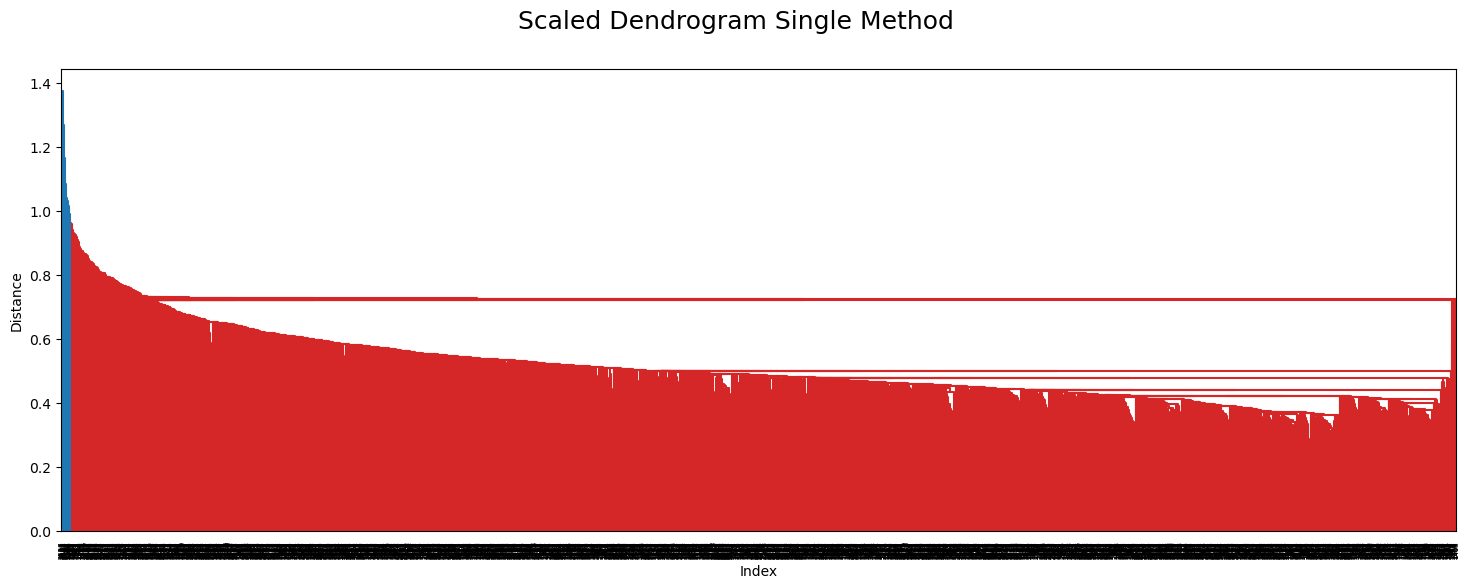

In [23]:
dendro_single = linkage(df_scale.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="single")
plt.figure(figsize=(18,6))
dendrogram(dendro_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Scaled Dendrogram Single Method",fontsize=18)
plt.show()

#### note: multiple clusters however not easily distingushible

In [24]:
yeardf_SM=df_scale.copy()

yeardf_SM['clust2']=fcluster(dendro_single,2, criterion='maxclust')
yeardf_SM['clust3']=fcluster(dendro_single,3, criterion='maxclust')
yeardf_SM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
0,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,...,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425,2,2
1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,...,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265,2,2
2,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,...,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609,2,2
3,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,...,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114,2,2
4,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,...,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290,2,2


#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(data=yeardf_SM)

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(data=yeardf_SM)

plt.subplot(1,3,3)
plt.title("Single Method",fontsize=14)
sns.scatterplot(data=yeardf_SM)

plt.figure(figsize=(15,5))
plt.title("K = 2",fontsize=10)
sns.swarmplot(data=yeardf_SM)

plt.figure(figsize=(15,5))
plt.title("K = 3",fontsize=10)
sns.swarmplot(data=yeardf_SM)

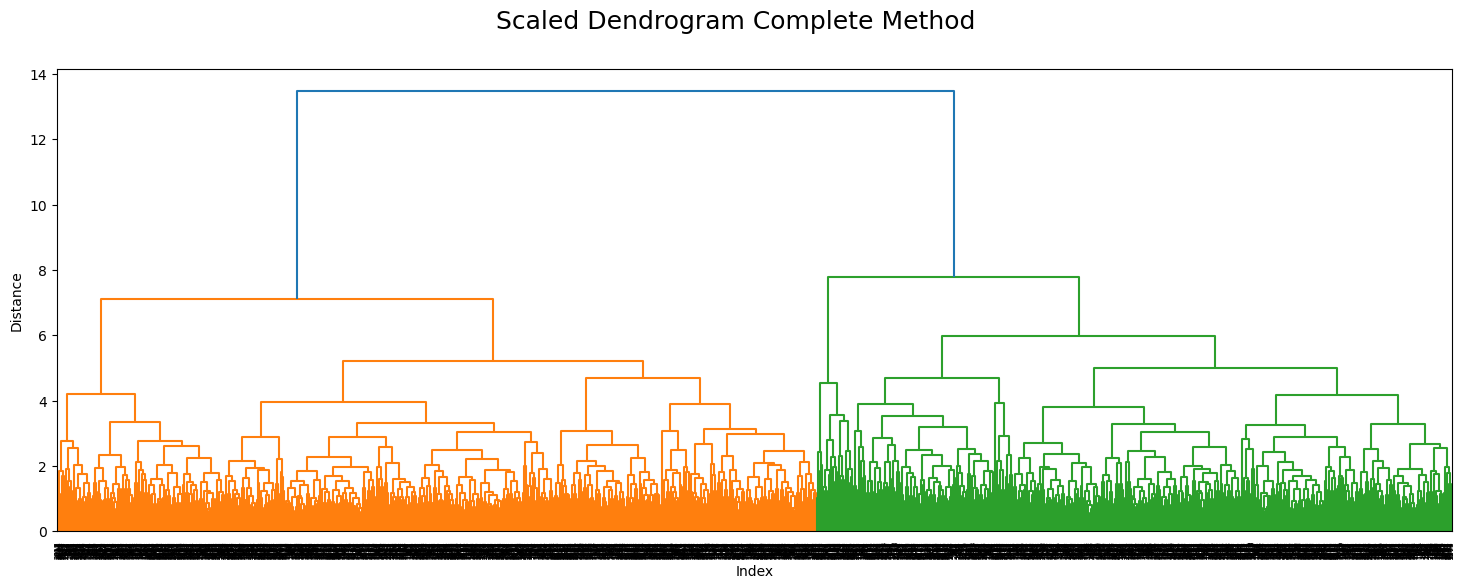

In [25]:
#dendro complete
dendro_complete = linkage(df_scale.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dendro_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle(" Scaled Dendrogram Complete Method",fontsize=18)
plt.show()

###### note: Three cluster groups found

In [26]:
#complete dataframe
yeardf_CM=df_scale.copy()

yeardf_CM['clust2']=fcluster(dendro_complete,2, criterion='maxclust')
yeardf_CM['clust3']=fcluster(dendro_complete,3, criterion='maxclust')
yeardf_CM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
0,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,...,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425,2,3
1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,...,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265,2,3
2,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,...,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609,2,3
3,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,...,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114,2,3
4,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,...,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290,2,3


#plot the clusters against the answers for complete
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(data=yeardf_CM)

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(data=yeardf_CM)

plt.subplot(1,3,3)
plt.title("Complete Method",fontsize=14)
sns.scatterplot(data=yeardf_CM)

#complete
plt.figure(figsize=(15,5))
plt.title("K = 2",fontsize=10)
sns.swarmplot(data=yeardf_CM)

plt.figure(figsize=(15,5))
plt.title("K = 3",fontsize=10)
sns.swarmplot(data=yeardf_CM)

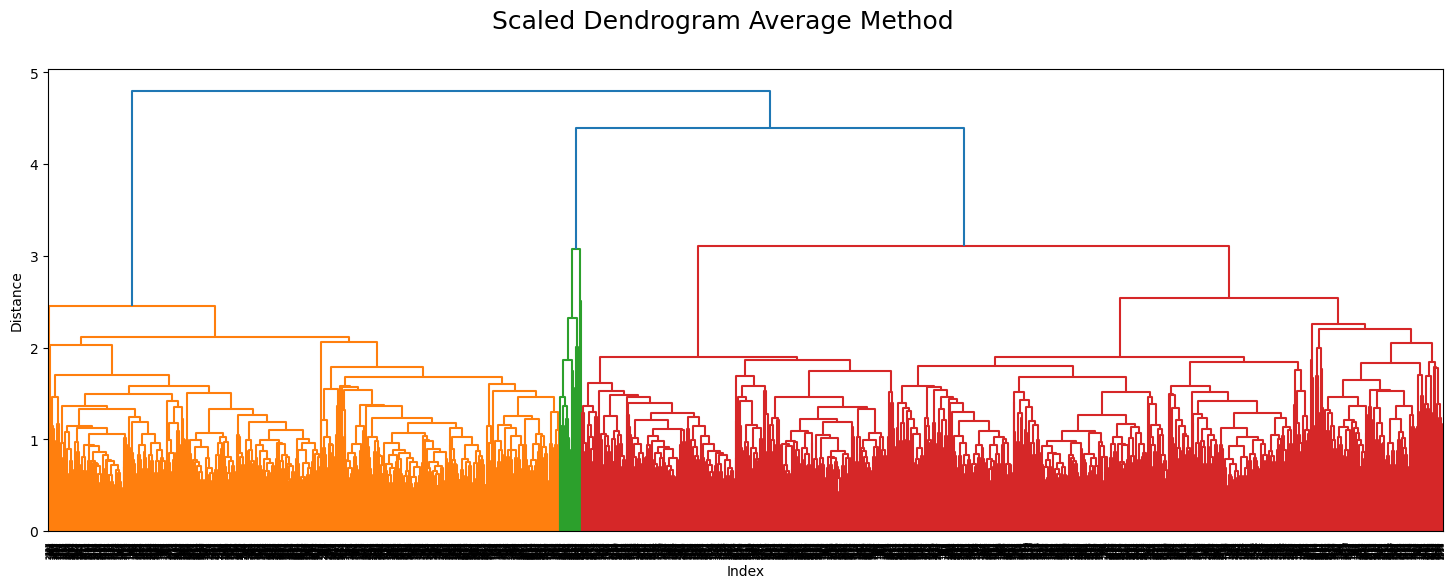

In [27]:
#dendro average
dendro_average = linkage(df_scale.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="average")
plt.figure(figsize=(18,6))
dendrogram(dendro_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Scaled Dendrogram Average Method",fontsize=18)
plt.show()

#### note :Five cluster groups found, 4 easily visible

In [28]:
#average dataframe
yeardf_AVG=df_scale.copy()

yeardf_AVG['clust2']=fcluster(dendro_average,2, criterion='maxclust')
yeardf_AVG['clust3']=fcluster(dendro_average,3, criterion='maxclust')
yeardf_AVG.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
0,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,...,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425,2,3
1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,...,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265,2,3
2,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,...,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609,2,3
3,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,...,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114,2,3
4,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,...,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290,2,3


#plot the clusters against the answers for average 
plt.figure(figsize=(25,8))

plt.suptitle("Average Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(data=yeardf_AVG)

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(data=yeardf_AVG)

plt.subplot(1,3,3)
plt.title("Average Method",fontsize=14)
sns.scatterplot(data=yeardf_AVG)

#average
plt.figure(figsize=(15,5))
plt.title("K = 2",fontsize=10)
sns.swarmplot(data=yeardf_AVG)

plt.figure(figsize=(15,5))
plt.title("K = 3",fontsize=10)
sns.swarmplot(data=yeardf_AVG)

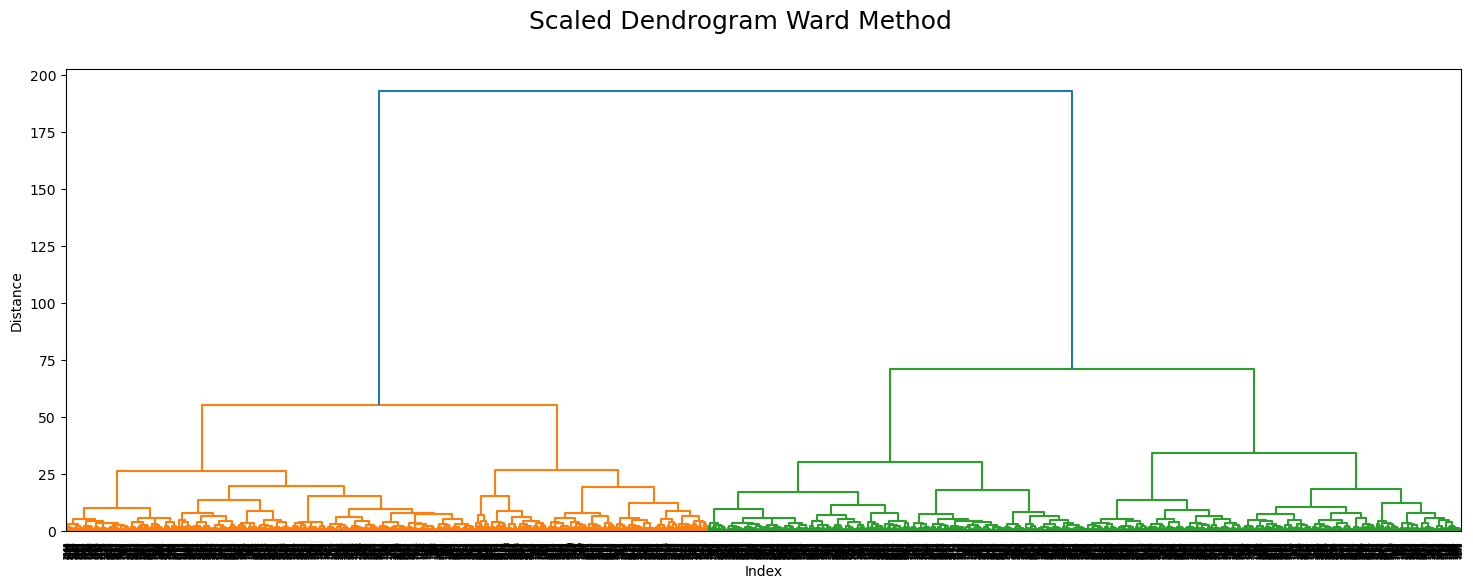

In [29]:
#dendro ward
dendro_ward = linkage(df_scale.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(dendro_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Scaled Dendrogram Ward Method",fontsize=18)
plt.show()

#### note : Three Clusters found

In [30]:
#ward dataframe
yeardf_WM=df_scale.copy()

yeardf_WM['clust2']=fcluster(dendro_ward,2, criterion='maxclust')
yeardf_WM['clust3']=fcluster(dendro_ward,3, criterion='maxclust')
yeardf_WM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
0,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,...,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425,1,1
1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,...,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265,1,1
2,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,...,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609,1,1
3,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,...,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114,1,1
4,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,...,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290,1,1


#plot the clusters against the answers for ward 
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(data=yeardf_WM)

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(data=yeardf_WM)

plt.subplot(1,3,3)
plt.title("Ward Method",fontsize=14)
sns.scatterplot(data=yeardf_WM)

In [31]:
#Look at all of the confusion matrices results together.
print("SINGLE")
print(pd.crosstab(yeardf_SM['OSLO_temp_max'],yeardf_SM["clust3"]))
print("COMPLETE")
print(pd.crosstab(yeardf_CM['OSLO_temp_max'],yeardf_CM["clust3"]))
print("AVERAGE")
print(pd.crosstab(yeardf_AVG['OSLO_temp_max'],yeardf_AVG["clust3"]))
print("WARD")
print(pd.crosstab(yeardf_WM['OSLO_temp_max'],yeardf_WM["clust3"]))

SINGLE
clust3         1  2  3
OSLO_temp_max         
-2.676855      0  1  0
-2.587691      0  0  1
-2.576545      0  1  0
-2.565399      0  1  0
-2.509671      0  1  0
...           .. .. ..
 2.227210      0  1  0
 2.249501      0  2  0
 2.294084      0  1  0
 2.316375      0  1  0
 2.327521      0  1  0

[400 rows x 3 columns]
COMPLETE
clust3         1  2  3
OSLO_temp_max         
-2.676855      0  1  0
-2.587691      0  0  1
-2.576545      0  1  0
-2.565399      0  0  1
-2.509671      0  0  1
...           .. .. ..
 2.227210      1  0  0
 2.249501      2  0  0
 2.294084      1  0  0
 2.316375      1  0  0
 2.327521      1  0  0

[400 rows x 3 columns]
AVERAGE
clust3         1  2  3
OSLO_temp_max         
-2.676855      0  1  0
-2.587691      0  1  0
-2.576545      0  1  0
-2.565399      0  1  0
-2.509671      0  0  1
...           .. .. ..
 2.227210      1  0  0
 2.249501      2  0  0
 2.294084      1  0  0
 2.316375      1  0  0
 2.327521      1  0  0

[400 rows x 3 columns]
WARD
cl

## 4 Dendrogram Unscaled

In [32]:
#reducing dataset to a year range
unyeardf=df[df['DATE'].astype(str).str.contains('199')]
print(unyeardf)

       Unnamed: 0      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
10958       10958  19900101      1                  0               2.1   
10959       10959  19900102      1                  2               2.1   
10960       10960  19900103      1                  8               2.1   
10961       10961  19900104      1                  2               2.1   
10962       10962  19900105      1                  7               2.1   
...           ...       ...    ...                ...               ...   
14605       14605  19991227     12                  7               2.1   
14606       14606  19991228     12                  8               2.1   
14607       14607  19991229     12                  8               2.1   
14608       14608  19991230     12                  7               2.1   
14609       14609  19991231     12                  7               2.1   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
10958            0.83          1.0

In [33]:
#checking for missing values 
unyeardf.isnull().sum()

Unnamed: 0             0
DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_wind_speed       0
                      ..
VALENTIA_snow_depth    0
VALENTIA_sunshine      0
VALENTIA_temp_mean     0
VALENTIA_temp_min      0
VALENTIA_temp_max      0
Length: 171, dtype: int64

In [34]:
#dropping unscaled data
noscaledf = unyeardf.drop(['DATE','MONTH','Unnamed: 0'], axis=1)

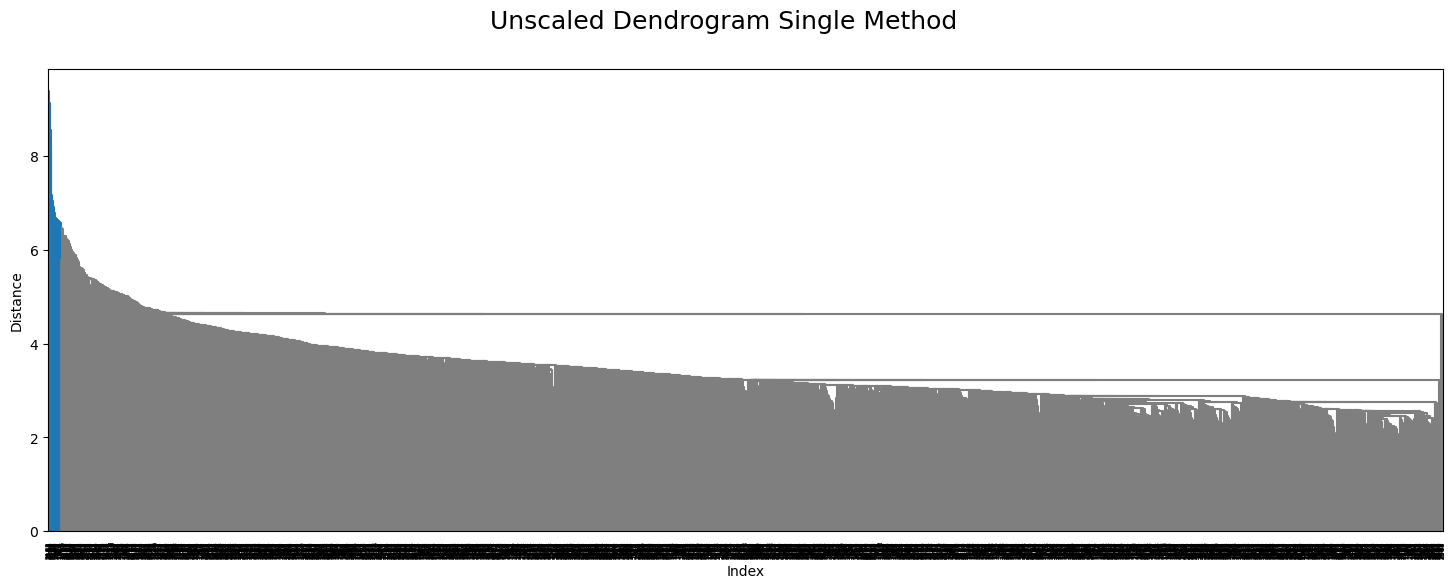

In [23]:
#single dendro unscaled
undendro_single = linkage(noscaledf.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="single")
plt.figure(figsize=(18,6))
dendrogram(undendro_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Unscaled Dendrogram Single Method",fontsize=18)
plt.show()

##### note: indistinguishable amount of clusters

In [24]:
unyeardf_SM=noscaledf.copy()

unyeardf_SM['clust2']=fcluster(undendro_single,2, criterion='maxclust')
unyeardf_SM['clust3']=fcluster(undendro_single,3, criterion='maxclust')
unyeardf_SM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4,1,1
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9,1,1
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7,1,1
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0,1,1
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7,1,1


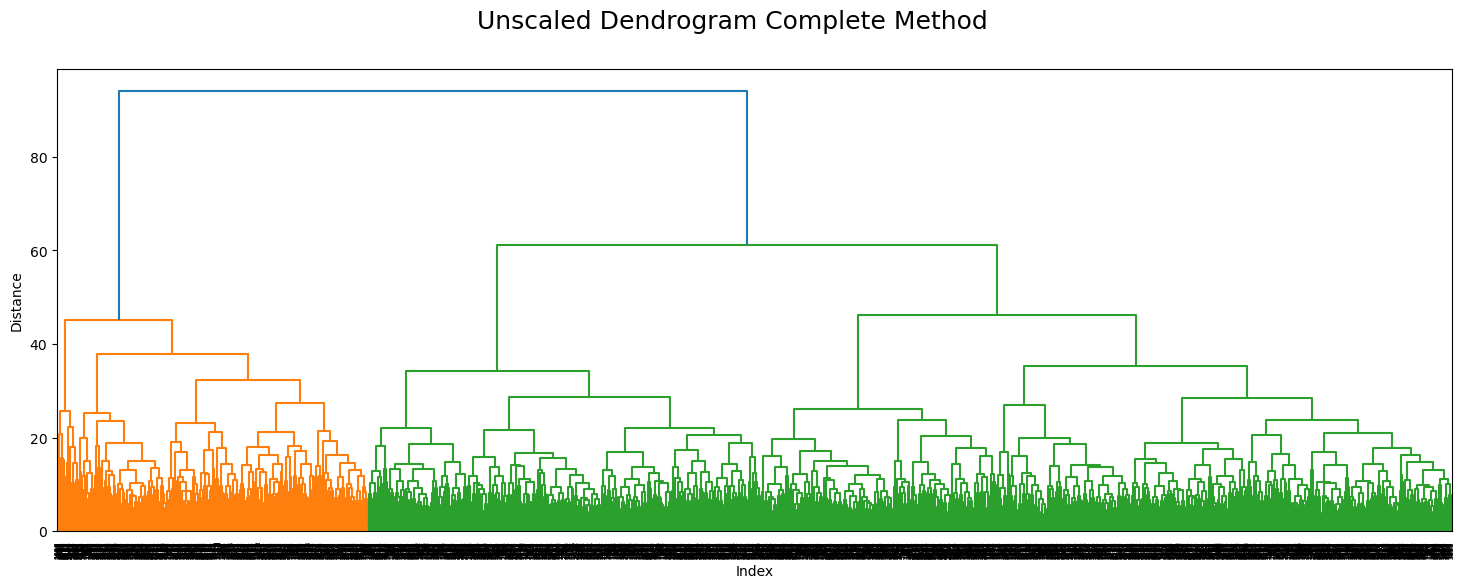

In [25]:
#dendro complete
undendro_complete = linkage(noscaledf.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(undendro_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Unscaled Dendrogram Complete Method",fontsize=18)
plt.show()

#### note: three clusters

In [26]:
#complete dataframe
unyeardf_CM=noscaledf.copy()

unyeardf_CM['clust2']=fcluster(undendro_complete,2, criterion='maxclust')
unyeardf_CM['clust3']=fcluster(undendro_complete,3, criterion='maxclust')
unyeardf_CM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4,1,1
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9,1,1
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7,1,1
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0,1,1
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7,1,1


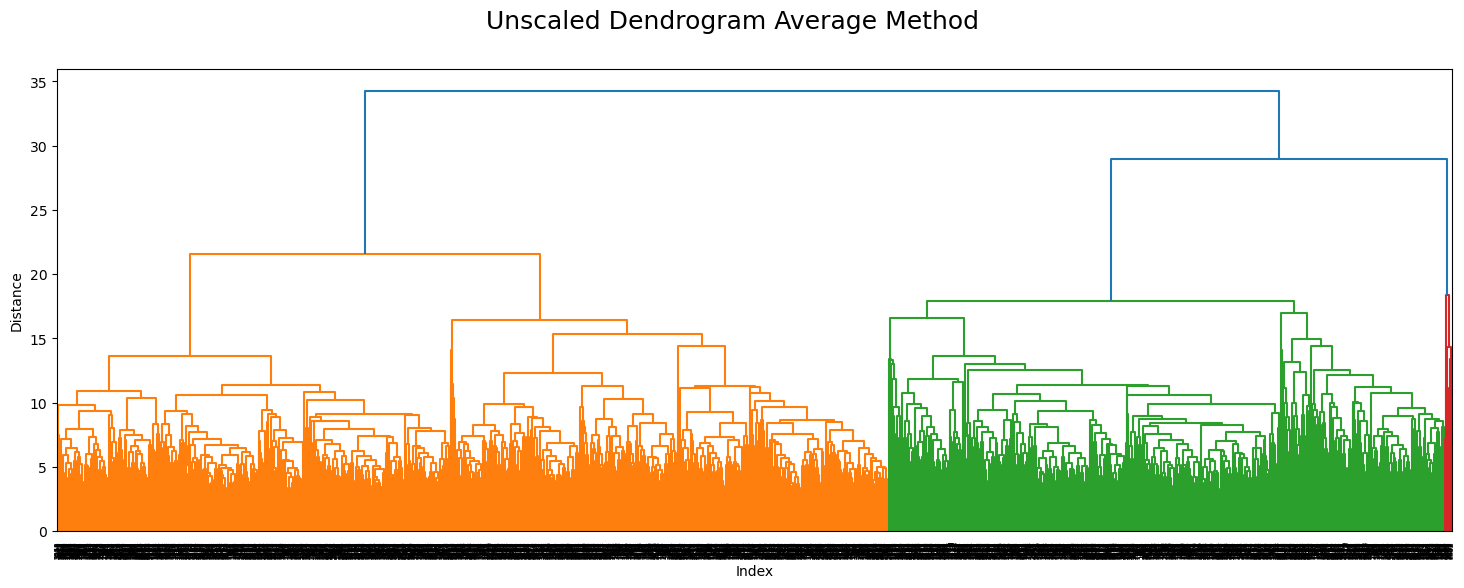

In [27]:
#dendro average
undendro_average = linkage(noscaledf.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="average")
plt.figure(figsize=(18,6))
dendrogram(undendro_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Unscaled Dendrogram Average Method",fontsize=18)
plt.show()

#### note: five clusters, one indistingishable 

In [28]:
#average dataframe
unyeardf_AVG=noscaledf.copy()

unyeardf_AVG['clust2']=fcluster(undendro_average,2, criterion='maxclust')
unyeardf_AVG['clust3']=fcluster(undendro_average,3, criterion='maxclust')
unyeardf_AVG.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4,2,2
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9,2,2
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7,2,2
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0,2,2
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7,2,2


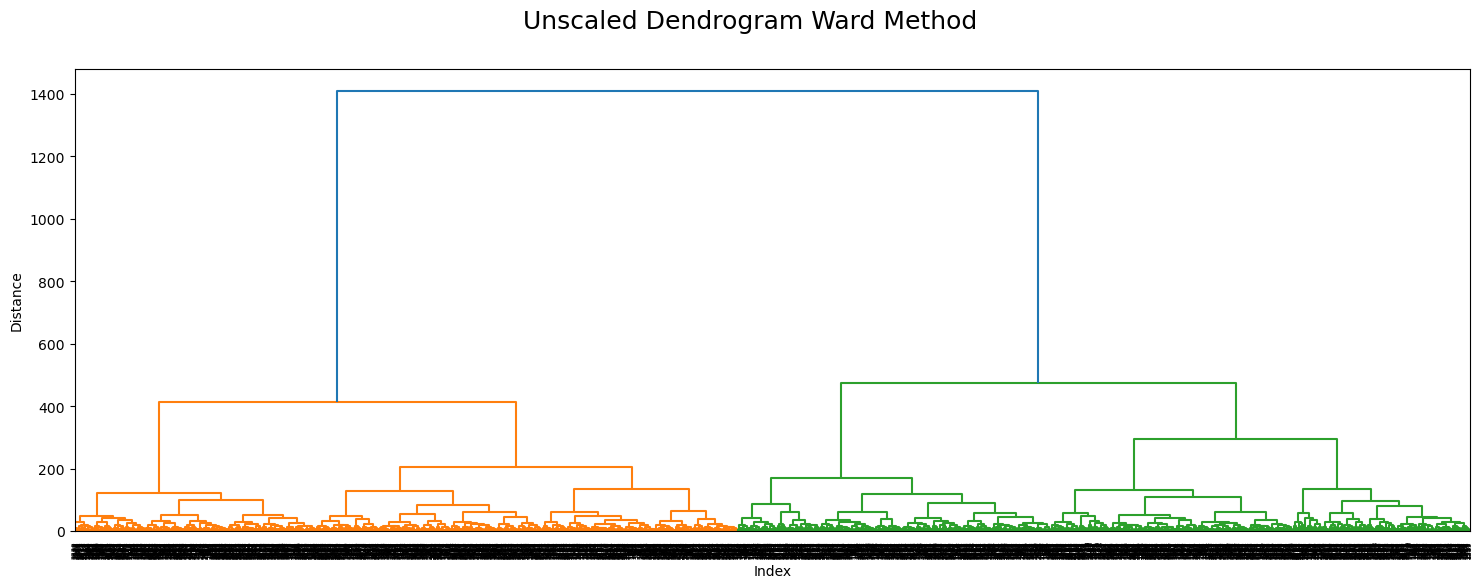

In [29]:
#dendro ward
undendro_ward = linkage(noscaledf.loc[:,['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'OSLO_temp_mean',
 'VALENTIA_temp_mean']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(undendro_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Unscaled Dendrogram Ward Method",fontsize=18)
plt.show()

#### note: three clusters

In [30]:
#ward dataframe
unyeardf_WM=noscaledf.copy()

unyeardf_WM['clust2']=fcluster(undendro_ward,2, criterion='maxclust')
unyeardf_WM['clust3']=fcluster(undendro_ward,3, criterion='maxclust')
unyeardf_WM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,clust2,clust3
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4,2,3
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9,2,3
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7,2,3
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0,2,3
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7,2,3


In [31]:
#Look at all of the confusion matrices results together.
print("SINGLE")
print(pd.crosstab(unyeardf_SM['OSLO_temp_max'],unyeardf_SM["clust3"]))
print("COMPLETE")
print(pd.crosstab(unyeardf_CM['OSLO_temp_max'],unyeardf_CM["clust3"]))
print("AVERAGE")
print(pd.crosstab(unyeardf_AVG['OSLO_temp_max'],unyeardf_AVG["clust3"]))
print("WARD")
print(pd.crosstab(unyeardf_WM['OSLO_temp_max'],unyeardf_WM["clust3"]))

SINGLE
clust3         1  2  3
OSLO_temp_max         
-13.6          1  0  0
-12.8          0  0  1
-12.7          1  0  0
-12.6          0  1  0
-12.1          1  0  0
...           .. .. ..
 30.4          1  0  0
 30.6          2  0  0
 31.0          1  0  0
 31.2          1  0  0
 31.3          1  0  0

[400 rows x 3 columns]
COMPLETE
clust3         1  2  3
OSLO_temp_max         
-13.6          1  0  0
-12.8          1  0  0
-12.7          1  0  0
-12.6          1  0  0
-12.1          1  0  0
...           .. .. ..
 30.4          0  0  1
 30.6          0  0  2
 31.0          0  0  1
 31.2          0  0  1
 31.3          0  0  1

[400 rows x 3 columns]
AVERAGE
clust3         1  2  3
OSLO_temp_max         
-13.6          0  1  0
-12.8          0  1  0
-12.7          0  1  0
-12.6          0  1  0
-12.1          0  1  0
...           .. .. ..
 30.4          1  0  0
 30.6          2  0  0
 31.0          1  0  0
 31.2          1  0  0
 31.3          1  0  0

[400 rows x 3 columns]
WARD
cl